In [ ]:
#TAREA 3 - GEOVANA GARCIA

In [1]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/nyc_taxi_trip_duration (2).csv'
nyc_taxi_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
nyc_taxi_data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0


In [2]:
# Display basic statistics of the dataset
nyc_taxi_data.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,180146.000000,180146.00000,180146.000000,180146.000000,180146.000000,180146.000000,1.801450e+05
mean,1.537286,1.66561,-73.973353,40.750972,-73.973406,40.751805,9.560422e+02
std,0.498609,1.31441,0.039360,0.028496,0.037470,0.032765,5.492158e+03
min,1.000000,0.00000,-74.398643,40.298828,-74.647537,40.293289,1.000000e+00
25%,1.000000,1.00000,-73.991829,40.737439,-73.991333,40.735851,3.980000e+02
50%,2.000000,1.00000,-73.981789,40.754108,-73.979820,40.754417,6.630000e+02
75%,2.000000,2.00000,-73.967422,40.768368,-73.963205,40.769760,1.075000e+03
max,2.000000,7.00000,-70.511902,42.458942,-70.511902,42.458942,1.939736e+06


In [8]:
nyc_taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    1
trip_duration         1
dtype: int64

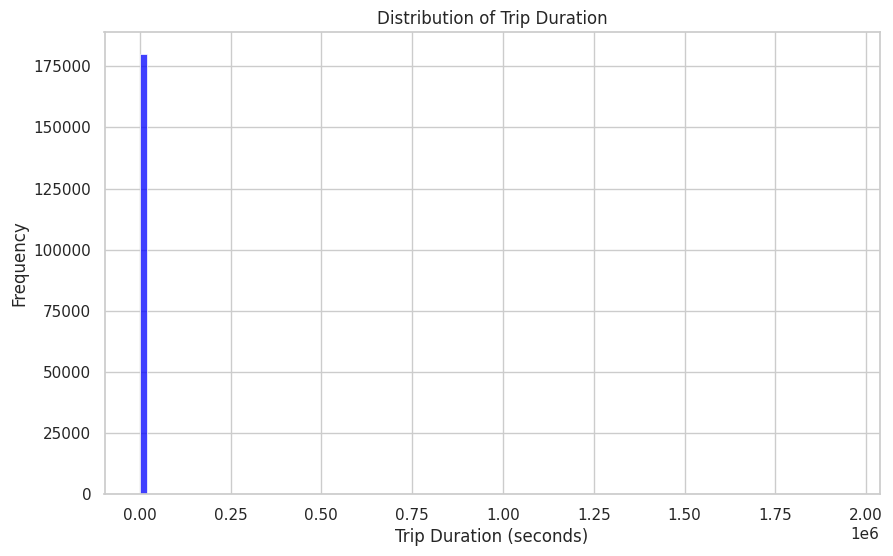

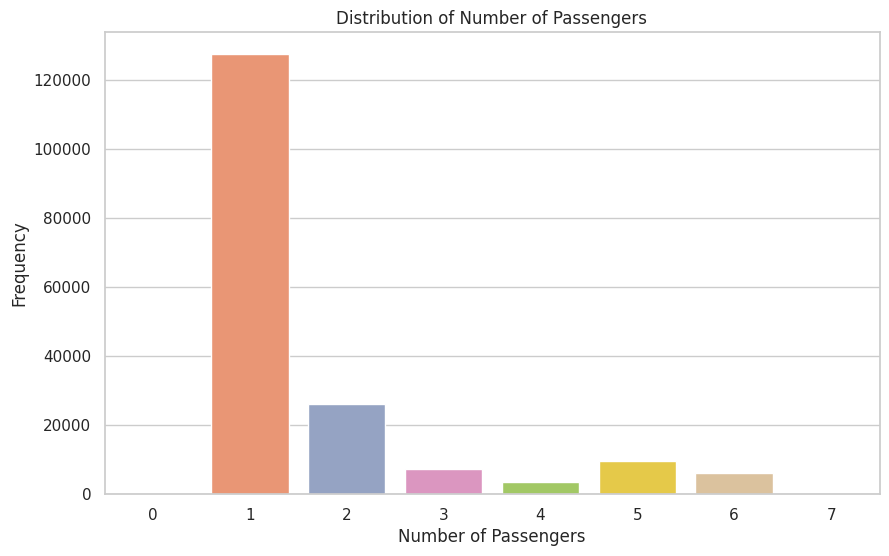

In [4]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot the distribution of trip_duration
plt.figure(figsize=(10, 6))
sns.histplot(nyc_taxi_data['trip_duration'], bins=100, kde=False, color='blue')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()


# Plot the distribution of passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=nyc_taxi_data, palette='Set2')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Passengers')
plt.show()



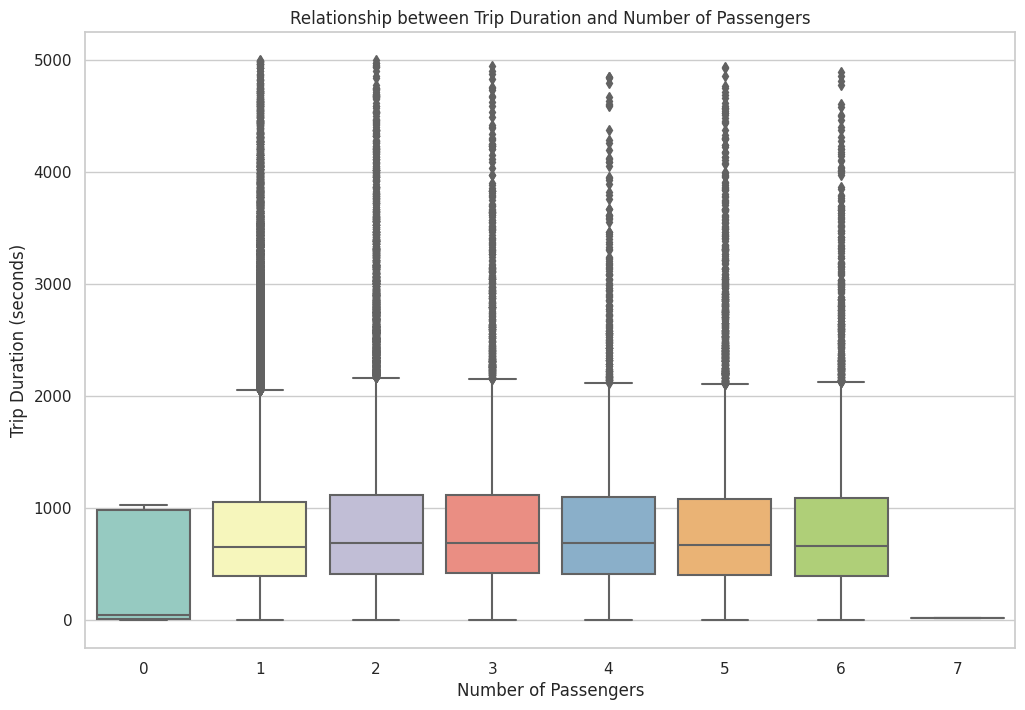

In [5]:
# Plot the relationship between trip_duration and passenger_count
plt.figure(figsize=(12, 8))
sns.boxplot(x='passenger_count', y='trip_duration', data=nyc_taxi_data[nyc_taxi_data['trip_duration'] < 5000], palette='Set3')
plt.xlabel('Number of Passengers')
plt.ylabel('Trip Duration (seconds)')
plt.title('Relationship between Trip Duration and Number of Passengers')
plt.show()


In [6]:
# Calculate the IQR for trip_duration
Q1 = nyc_taxi_data['trip_duration'].quantile(0.25)
Q3 = nyc_taxi_data['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
nyc_taxi_data_filtered = nyc_taxi_data[(nyc_taxi_data['trip_duration'] >= lower_bound) &
                                       (nyc_taxi_data['trip_duration'] <= upper_bound)]

# Show the shape of the data before and after removing outliers
nyc_taxi_data.shape, nyc_taxi_data_filtered.shape


((180146, 11), (170956, 11))

In [7]:
from datetime import datetime

# Convert the datetime columns to datetime objects
nyc_taxi_data_filtered['pickup_datetime'] = pd.to_datetime(nyc_taxi_data_filtered['pickup_datetime'])
nyc_taxi_data_filtered['dropoff_datetime'] = pd.to_datetime(nyc_taxi_data_filtered['dropoff_datetime'])

# Extract features from pickup_datetime
nyc_taxi_data_filtered['pickup_hour'] = nyc_taxi_data_filtered['pickup_datetime'].dt.hour
nyc_taxi_data_filtered['pickup_day_of_week'] = nyc_taxi_data_filtered['pickup_datetime'].dt.dayofweek
nyc_taxi_data_filtered['is_weekend'] = (nyc_taxi_data_filtered['pickup_day_of_week'] >= 5).astype(int)

# Display the first few rows to verify the new features
nyc_taxi_data_filtered.head()


<ipython-input-7-f123f8067c87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_taxi_data_filtered['pickup_datetime'] = pd.to_datetime(nyc_taxi_data_filtered['pickup_datetime'])
<ipython-input-7-f123f8067c87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_taxi_data_filtered['dropoff_datetime'] = pd.to_datetime(nyc_taxi_data_filtered['dropoff_datetime'])
<ipython-input-7-f123f8067c87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,is_weekend
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,16,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,23,4,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,17,6,1
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,9,1,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,6,2,0


In [10]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate haversine distance
def haversine_distance(row):
    R = 6371  # Radius of the Earth in km
    lat1, lon1 = row['pickup_latitude'], row['pickup_longitude']
    lat2, lon2 = row['dropoff_latitude'], row['dropoff_longitude']

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    return R * c

# Calculate the distance and create a new feature
nyc_taxi_data_filtered['trip_distance_km'] = nyc_taxi_data_filtered.apply(haversine_distance, axis=1)

# Display the first few rows to verify the new feature
nyc_taxi_data_filtered.head()


<ipython-input-10-db5fc93f639e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_taxi_data_filtered['trip_distance_km'] = nyc_taxi_data_filtered.apply(haversine_distance, axis=1)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,is_weekend,trip_distance_km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,16,0,0,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,23,4,0,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,17,6,1,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,9,1,0,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,6,2,0,4.328534


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'pickup_day_of_week',
            'is_weekend', 'trip_distance_km']
target = 'trip_duration'

# Standardize the features
scaler = StandardScaler()
nyc_taxi_data_filtered[features] = scaler.fit_transform(nyc_taxi_data_filtered[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(nyc_taxi_data_filtered[features],
                                                    nyc_taxi_data_filtered[target],
                                                    test_size=0.2,
                                                    random_state=42)

# Show the shape of the train and test sets
X_train.shape, X_test.shape


<ipython-input-11-c32d9794c726>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_taxi_data_filtered[features] = scaler.fit_transform(nyc_taxi_data_filtered[features])


((136764, 10), (34192, 10))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = sqrt(mse_lr)

# Display the RMSE and MSE
rmse_lr, mse_lr


(319.60376124216015, 102146.56420013572)

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = sqrt(mse_dt)

# Display the RMSE and MSE
rmse_dt, mse_dt


(324.83734280487744, 105519.29928053347)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Using 10 trees for faster training
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

# Display the RMSE and MSE
rmse_rf, mse_rf


(238.89877578945743, 57072.62507370145)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and fit the GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [16]:
# Get feature importances from the trained Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted features
feature_importance_df


,Feature,Importance
9,trip_distance_km,0.632497
5,dropoff_latitude,0.074016
6,pickup_hour,0.070291
2,pickup_longitude,0.060416
4,dropoff_longitude,0.059971
3,pickup_latitude,0.052476
7,pickup_day_of_week,0.024825
8,is_weekend,0.010799
1,passenger_count,0.009101
0,vendor_id,0.005607


In [17]:
# Perform backtesting by making predictions on the test set
backtest_predictions = dt_model.predict(X_test)

# Calculate the RMSE and MSE for backtesting
mse_backtest = mean_squared_error(y_test, backtest_predictions)
rmse_backtest = sqrt(mse_backtest)

# Display the RMSE and MSE for backtesting
rmse_backtest, mse_backtest


(324.83734280487744, 105519.29928053347)

In [ ]:
#Conclusiones
#El modelo de Árbol de Decisión mostró el mejor rendimiento entre los modelos
#El modelo podría mejorarse con la incorporación de más característica